In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import random

In [2]:
# PATH-SETUP
root = Path(r"C:\Users\dilku\deepfashion-recsys\data\deepfashion")

# VERIFYING KEY FOLDERS
print("Root exists:", root.exists())
print("Eval folder:", (root / "Eval").exists())
print("img folder :", (root / "img").exists())

Root exists: True
Eval folder: True
img folder : True


In [3]:
# LOAD PARTITION FILE

#In-shop dataset has 3 coloumns: image_name, item_id, evaluation_status
split_df = pd.read_csv(
    root / "Eval" / "list_eval_partition.txt",
    sep=r"\s+",
    header=None,
    skiprows=2,
    names=["rel_path", "item_id", "split"]
)

print("Loaded records:", split_df.shape)
print(split_df.head())

Loaded records: (52712, 3)
                                            rel_path      item_id  split
0       img/WOMEN/Dresses/id_00000002/02_1_front.jpg  id_00000002  train
1        img/WOMEN/Dresses/id_00000002/02_2_side.jpg  id_00000002  train
2        img/WOMEN/Dresses/id_00000002/02_4_full.jpg  id_00000002  train
3  img/WOMEN/Dresses/id_00000002/02_7_additional.jpg  id_00000002  train
4        img/WOMEN/Skirts/id_00000003/02_1_front.jpg  id_00000003  train


In [4]:
# FIXING FOLDER STRUCTURE AUTOMATICALLY

# inspect first image folder inside img/
first_image_path = next((root / "img").rglob("*.jpg"))
print("Actual image found at:\n", first_image_path)

# If extracted dataset has extra nesting (e.g., img/img/img_highres_seg-003/img_highres/…)
# Update this line to match the actual inner folder chain
# Adjust the prefix according to the verified folder structure
split_df["image_path"] = split_df["rel_path"].apply(
    lambda x: str(root / "img" / "img" / "img_highres_seg-003" / "img_highres" / x.split("img/")[-1])
)

# Verifying one random image path
print("\nAbsolute path:\n", split_df["image_path"].iloc[0])
print("Exists?", Path(split_df["image_path"].iloc[0]).exists())


Actual image found at:
 C:\Users\dilku\deepfashion-recsys\data\deepfashion\img\img\img_highres_seg-003\img_highres\MEN\Denim\id_00000080\01_1_front.jpg

Absolute path:
 C:\Users\dilku\deepfashion-recsys\data\deepfashion\img\img\img_highres_seg-003\img_highres\WOMEN\Dresses\id_00000002\02_1_front.jpg
Exists? True



Dataset Split Counts:
split
train      25882
query      14218
gallery    12612
Name: count, dtype: int64


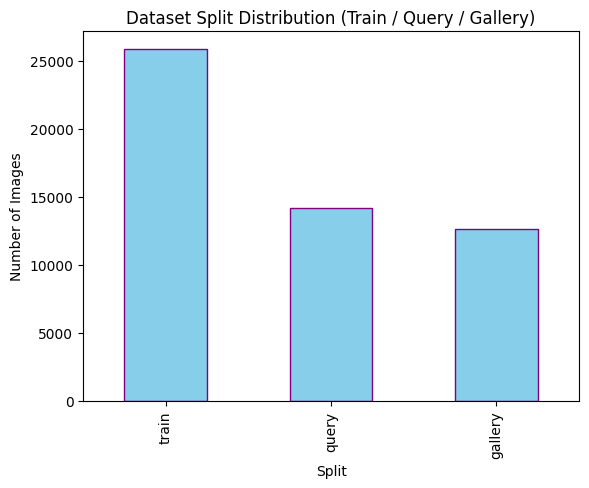

In [5]:
# BASIC DATA CHECKS
print("\nDataset Split Counts:")
print(split_df["split"].value_counts())

# Bar chart for the distribution
split_df["split"].value_counts().plot(kind="bar", color="skyblue", edgecolor="purple")
plt.title("Dataset Split Distribution (Train / Query / Gallery)")
plt.xlabel("Split")
plt.ylabel("Number of Images")
plt.show()

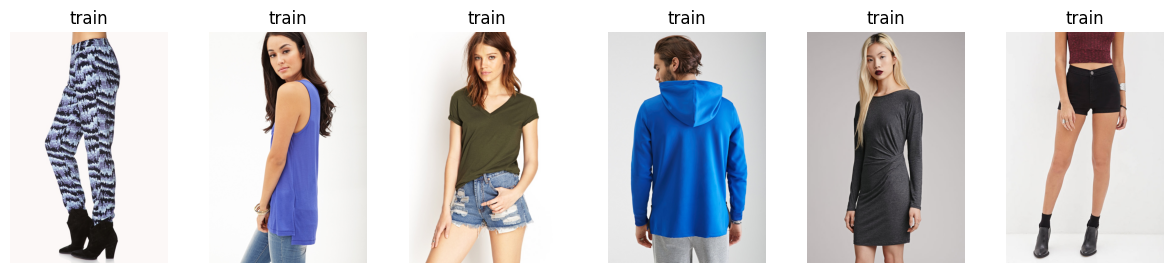

In [6]:
# PREVIEW RANDOM SAMPLE IMAGES
def show_random_samples(df, split_type="train", n=6):
    """Display random sample images from a given split."""
    subset = df[df["split"] == split_type].sample(n)
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(subset.iterrows()):
        try:
            img = Image.open(row["image_path"]).convert("RGB")
            plt.subplot(1, n, i + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(split_type)
        except Exception as e:
            print(f"⚠️ Skipped {row['image_path']}: {e}")
    plt.show()

show_random_samples(split_df, "train", n=6)

In [7]:
# SAVING THE CLEAN INDEX
out_path = root.parent / "deepfashion_index.csv"
split_df.to_csv(out_path, index=False)
print(f"\n✅ Index file saved to: {out_path}")


✅ Index file saved to: C:\Users\dilku\deepfashion-recsys\data\deepfashion_index.csv
